     Feature1   Feature2  Cluster
0   99.793391  27.838271        2
1   52.182410  32.085800        3
2   65.913538  47.020414        2
3   29.600374  97.418543        0
4   86.424146  57.728826        2
..        ...        ...      ...
95  45.828613  88.415196        1
96  38.576958   0.395527        3
97  67.569716  19.885126        2
98  79.006342   1.132179        2
99  73.692524  98.073524        1

[100 rows x 3 columns]


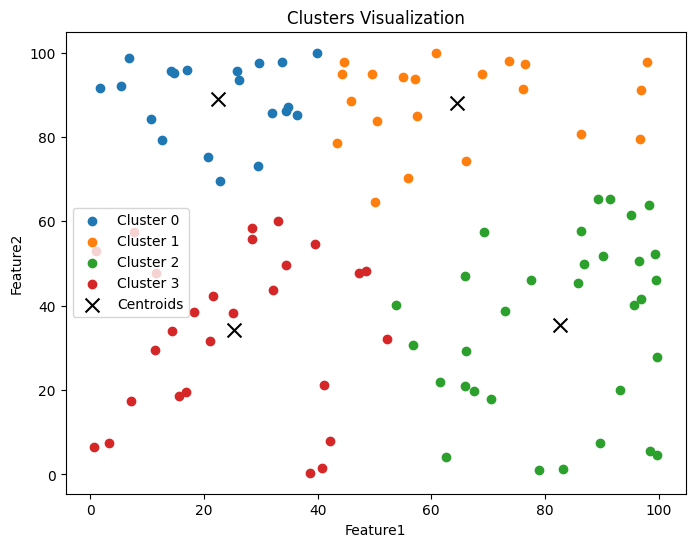

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans_clustering(data, k):
    centroids = data[np.random.choice(len(data), k, replace=False)]

    while True:
        # Compute distances and assign clusters
        distances = np.array([[euclidean_distance(point, centroid) for centroid in centroids] for point in data])
        clusters = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([
            data[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)
        ])
        # Checking the centriod in diff iterations
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


data = np.random.rand(100, 2) * 100  

df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

k = 4

clusters, centroids = kmeans_clustering(data, k)

df['Cluster'] = clusters

print(df)

plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')

plt.title('Clusters Visualization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()
